# SPAM EMAIL CLASSIFICATION USING NLP AND MACHINE LEARNING
This Spam Email Detection/Classifier System uses Natural Language Processing (NLP) and Machine Learning (ML) techniques to intelligently classify emails as spam or legitimate (ham). By analyzing the textual content, patterns, and other features of emails, the system can effectively filter unwanted messages, enhancing email usability and safeguarding users from potential threats.

Libraries

In [376]:

import pandas as pd
import numpy as np
import pickle
from pickle import dump
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer




In [377]:
# Load the dataset
data=pd.read_csv("spam.csv", encoding="latin-1")
data.shape

(5572, 5)

In [378]:
# Show dataset head (first 5 records)
data.head()
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [379]:
# Show dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [380]:
# Show dataset statistics
data.describe()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


Data Visualization

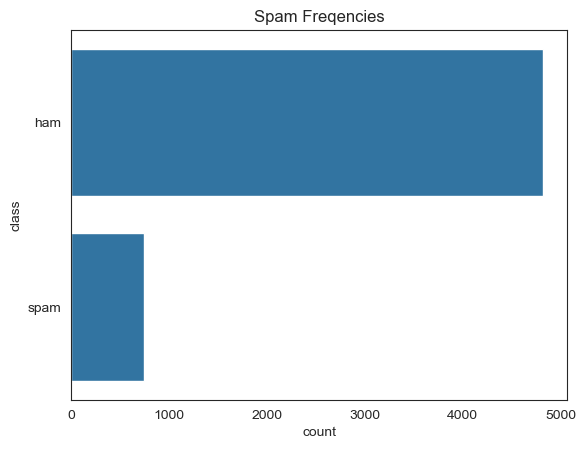

In [381]:

# Visualize spam  frequenices
plt.figure(dpi=100)
sns.countplot(data['class'])
plt.title("Spam Freqencies")
plt.show()

 Data Cleaning

In [382]:
data.columns

Index(['class', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [383]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [384]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [385]:
# Check for missing data for each column 
data.isnull().sum()

class      0
message    0
dtype: int64

In [386]:
# Check for duplicates and remove them 
data.drop_duplicates(inplace=True)

In [387]:
# Cleaning data from punctuation and stopwords and then tokenizing it into words (tokens)
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [388]:
data['class']=data['class'].map({'ham':0, 'spam':1})

In [389]:
data.head()

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [390]:

X=data['message']
y=data['class']

In [391]:
X.shape


(5169,)

In [392]:
y.shape


(5169,)

In [393]:
data.isnull().sum()


class      0
message    0
dtype: int64

In [394]:
cv=CountVectorizer()

In [395]:
X=cv.fit_transform(X)

In [396]:
#Data Splitting
x_train, x_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [397]:
x_train.shape

(4135, 8672)

In [398]:
x_test.shape

(1034, 8672)

Model

In [399]:
from sklearn.naive_bayes import MultinomialNB

In [400]:
model=MultinomialNB()

In [401]:
model.fit(x_train, y_train)

MultinomialNB()

In [407]:
model.score(x_train, y_train)

0.992503022974607

In [408]:
model.score(x_test, y_test)

0.9825918762088974

In [403]:
msg="You Won 500$"
data = [msg]
vect = cv.transform(data).toarray()
my_prediction = model.predict(vect)

In [404]:
vect

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [405]:
import pickle
pickle.dump(model, open('spam.pkl','wb'))
model1 = pickle.load(open('spam.pkl','rb'))


In [406]:
import pickle
pickle.dump(cv, open('vec.pkl','wb'))
model1 = pickle.load(open('spam.pkl','rb'))

# HAPPY CODING!